In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
incidents = pd.read_csv('./Data/Little_Rock_Police_Department_Statistics_2017_to_Year_to_Date.csv')
incidents.head()

,INCIDENT_DATE,INCIDENT_NUMBER,LOCATION_DISTRICT,OFFENSE_CODE,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,CITY,STATE,ZIP,LATITUDE,LONGITUDE,Location 1,Incident Status
0,4/18/2018 9:34,2018-045667,61.0,11A,RAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EX
1,10/13/2018 11:08,2018-131825,43.0,11A,RAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OP
2,12/7/2018 23:44,2018-157917,70.0,11A,RAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EX
3,3/29/2021 18:08,2021-032578,51.0,11A,RAPE,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC
4,4/24/2018 5:45,2018-048178,81.0,23F,THEFT FROM MOTOR VEHICLE,NaN,7900 SCOTT HAMILTON DR,LITTLE ROCK,AR,72209.0,34.67733,-92.319543,"(34.67733, -92.319543)",AD


In [4]:
#Data type of elements in INCIDENT_DATE column
incidents['INCIDENT_DATE'].dtype

dtype('O')

In [5]:
#Convert INCIDENT_DATE column to datetime
incidents['INCIDENT_DATE'] = pd.to_datetime(incidents['INCIDENT_DATE'])
incidents['INCIDENT_DATE'][0]

Timestamp('2018-04-18 09:34:00')

In [6]:
#Column TIME_OF_DAY which will be 0 if INCIDENT_DATE is after 6AM and before 6PM and 1 otherwise
incidents['TIME_OF_DAY'] = incidents['INCIDENT_DATE'].apply(lambda x: 0 if 6 <= x.hour < 18 else 1)
#Display head of incidents with only INCIDENT_DATE and TIME_OF_DAY columns
incidents[['INCIDENT_DATE', 'TIME_OF_DAY']].head()

,INCIDENT_DATE,TIME_OF_DAY
0,2018-04-18 09:34:00,0
1,2018-10-13 11:08:00,0
2,2018-12-07 23:44:00,1
3,2021-03-29 18:08:00,1
4,2018-04-24 05:45:00,1


In [7]:
#DAY_OF_WEEK column going from 0 to 6
incidents['DAY_OF_WEEK'] = incidents['INCIDENT_DATE'].apply(lambda x: x.weekday())
incidents[['INCIDENT_DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK']].head()

,INCIDENT_DATE,TIME_OF_DAY,DAY_OF_WEEK
0,2018-04-18 09:34:00,0,2
1,2018-10-13 11:08:00,0,5
2,2018-12-07 23:44:00,1,4
3,2021-03-29 18:08:00,1,0
4,2018-04-24 05:45:00,1,1


In [8]:
#TYPE_OF_DAY column which will be 1 if it's weekend and 0 otherwise
incidents['TYPE_OF_DAY'] = incidents['DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)
incidents[['INCIDENT_DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'TYPE_OF_DAY']].head()

,INCIDENT_DATE,TIME_OF_DAY,DAY_OF_WEEK,TYPE_OF_DAY
0,2018-04-18 09:34:00,0,2,0
1,2018-10-13 11:08:00,0,5,1
2,2018-12-07 23:44:00,1,4,0
3,2021-03-29 18:08:00,1,0,0
4,2018-04-24 05:45:00,1,1,0


In [9]:
#SEASON column which will be 0 if it's winter, 1 if it's spring, 2 if it's summer and 3 if it's fall
incidents['SEASON'] = incidents['INCIDENT_DATE'].apply(lambda x: 0 if x.month in [12, 1, 2] else 1 if x.month in [3, 4, 5] else 2 if x.month in [6, 7, 8] else 3)
incidents[['INCIDENT_DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'TYPE_OF_DAY', 'SEASON']].head()

,INCIDENT_DATE,TIME_OF_DAY,DAY_OF_WEEK,TYPE_OF_DAY,SEASON
0,2018-04-18 09:34:00,0,2,0,1
1,2018-10-13 11:08:00,0,5,1,3
2,2018-12-07 23:44:00,1,4,0,0
3,2021-03-29 18:08:00,1,0,0,1
4,2018-04-24 05:45:00,1,1,0,1


In [10]:
#MONTH column which will be the month of the year
incidents['MONTH'] = incidents['INCIDENT_DATE'].apply(lambda x: x.month)
incidents[['INCIDENT_DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'TYPE_OF_DAY', 'SEASON', 'MONTH']].head()

,INCIDENT_DATE,TIME_OF_DAY,DAY_OF_WEEK,TYPE_OF_DAY,SEASON,MONTH
0,2018-04-18 09:34:00,0,2,0,1,4
1,2018-10-13 11:08:00,0,5,1,3,10
2,2018-12-07 23:44:00,1,4,0,0,12
3,2021-03-29 18:08:00,1,0,0,1,3
4,2018-04-24 05:45:00,1,1,0,1,4


In [11]:
incidents.to_csv('./Data/Little_Rock_Police_Department_Statistics_2017_to_Year_to_Date_updated.csv', index=False)

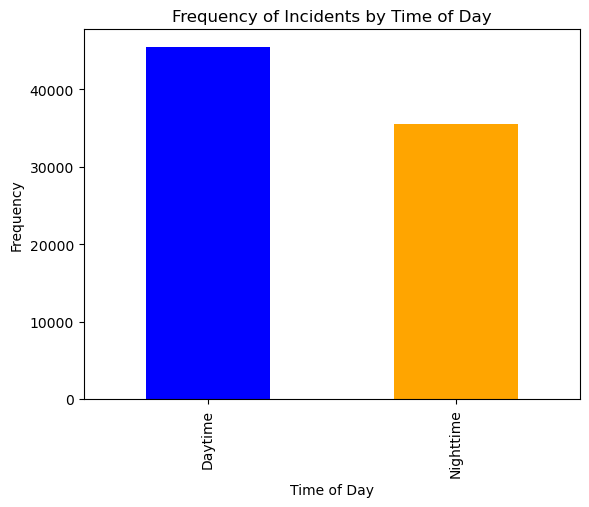

In [12]:
#Does the frequency of incidents change by time of day?
incidents['TIME_OF_DAY'].value_counts()
incidents['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Frequency of Incidents by Time of Day', color=['blue', 'orange'])
plt.xticks([0, 1], ['Daytime', 'Nighttime'])
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()

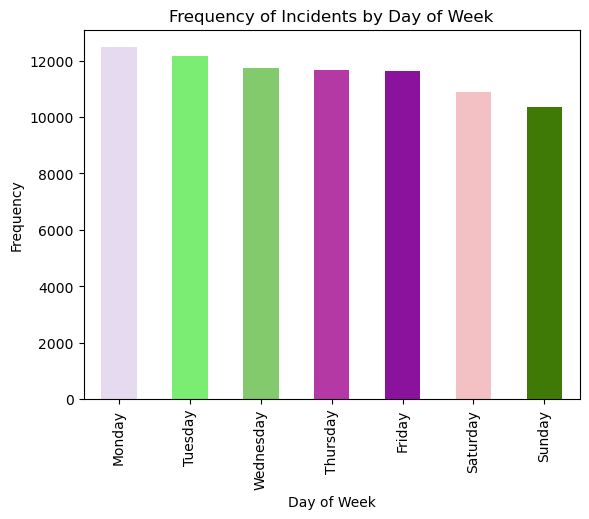

In [13]:
#Does the frequency of crimes change over week?
daily_incidents = incidents['DAY_OF_WEEK'].value_counts()
daily_incidents.plot(kind='bar', title='Frequency of Incidents by Day of Week', color=np.random.rand(len(daily_incidents),3))
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()


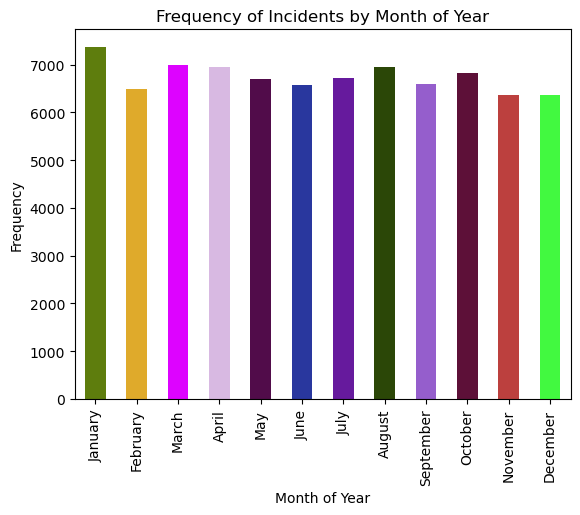

In [14]:
#Does the frequency of crimes change over year?
monthly_incidents = incidents['MONTH'].value_counts().sort_index()
monthly_incidents.plot(kind='bar', title='Frequency of Incidents by Month of Year', color=np.random.rand(len(monthly_incidents),3))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month of Year')
plt.ylabel('Frequency')
plt.show()

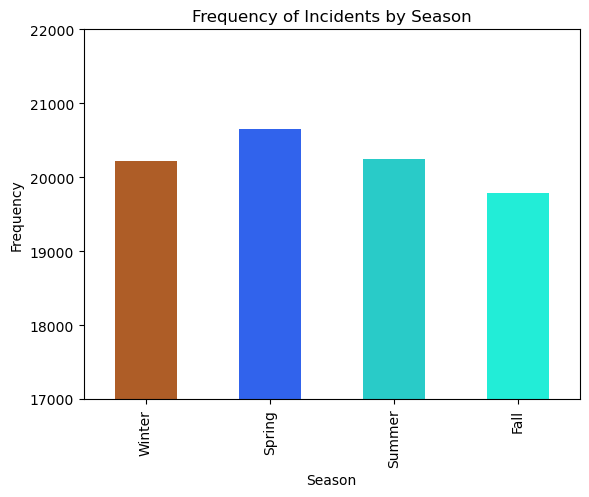

In [22]:
#Does the frequency of crimes change over seasons?
seasonal_incidents = incidents['SEASON'].value_counts().sort_index()
seasonal_incidents.plot(kind='bar', title='Frequency of Incidents by Season', color=np.random.rand(len(seasonal_incidents),3))
plt.ylim(17000, 22000)
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()